<a href="https://colab.research.google.com/github/engmohamedsalah/.NET-Backend-Developer-Roadmap/blob/master/m_salah_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building an AI-based Application

# Task 1:

Load the provided CSV dataset (sample-superstore.csv) into Python and print the first ten records with the associated column names.

In [1098]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [1099]:

# Read in CSV file and load data into a DataFrame
df_super_store = pd.read_csv('sample-superstore 2023 T3.csv')

# - The data is loaded into a DataFrame called df_super_store
# - This loads all the data from the CSV into memory for analysis

df_super_store = pd.read_csv('sample-superstore 2023 T3.csv')

In [1100]:
# print a sample of 10 rows from the dataframe
df_super_store.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1843,1710,CA-2017-123491,30/10/2017,11/05/2017,Standard Class,JK-15205,Jamie Kunitz,Consumer,United States,San Francisco,...,94122,West,FUR-CH-10003061,Furniture,Chairs,"Global Leather Task Chair, Black",71.992,1,0.2,-0.8999
6048,2544,US-2016-114174,09/08/2016,14/09/2016,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Malden,...,2148,East,FUR-BO-10003450,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Dark Cher...",173.940,3,0.0,13.9152
3147,4730,CA-2016-124681,18/07/2016,23/07/2016,Second Class,SV-20935,Susan Vittorini,Consumer,United States,Dallas,...,75217,Central,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,15.576,3,0.2,3.3099
3404,6241,US-2016-131912,29/10/2016,11/01/2016,Second Class,LH-17155,Logan Haushalter,Consumer,United States,Los Angeles,...,90008,West,OFF-BI-10004236,Office Supplies,Binders,"XtraLife ClearVue Slant-D Ring Binder, White, 3""",11.744,1,0.2,3.8168
9563,6560,CA-2016-160941,21/07/2016,26/07/2016,Standard Class,DK-12835,Damala Kotsonis,Corporate,United States,Roseville,...,95661,West,OFF-EN-10003001,Office Supplies,Envelopes,Ames Color-File Green Diamond Border X-ray Mai...,419.900,5,0.0,197.353
3985,3435,CA-2017-131212,12/05/2017,12/09/2017,Standard Class,AB-10165,Alan Barnes,Consumer,United States,Bellevue,...,98006,West,OFF-BI-10000145,Office Supplies,Binders,Zipper Ring Binder Pockets,14.976,6,0.2,5.4288
1992,3592,CA-2014-154186,13/12/2014,15/12/2014,Second Class,RA-19285,Ralph Arnett,Consumer,United States,Houston,...,77070,Central,OFF-SU-10001574,Office Supplies,Supplies,Acme Value Line Scissors,2.920,1,0.2,0.365
6959,4610,CA-2015-135020,28/05/2015,06/02/2015,Standard Class,MS-17770,Maxwell Schwartz,Consumer,United States,Rochester,...,14609,East,OFF-PA-10004255,Office Supplies,Paper,Xerox 219,45.360,7,0.0,21.7728
1421,2749,CA-2015-110247,12/04/2015,12/08/2015,Standard Class,RH-19555,Ritsa Hightower,Consumer,United States,Tallahassee,...,32303,South,OFF-BI-10001553,Office Supplies,Binders,SpineVue Locking Slant-D Ring Binders by Cardinal,8.226,3,0.7,-6.0324
7980,3782,CA-2015-135314,07/09/2015,14/07/2015,Second Class,MC-17575,Matt Collins,Consumer,United States,Philadelphia,...,19120,East,TEC-PH-10003072,Technology,Phones,Panasonic KX-TG9541B DECT 6.0 Digital 2-Line E...,269.982,3,0.4,40.4973


**Summary**

The dataset appears to contain information related to orders, with various

1.   Attributes for each row such as Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, and more. It seems to be a record of sales transactions, possibly for a retail or e-commerce company, as it includes details like product categories, sub-categories, product names, sales amounts, quantities, discounts, and profits. The dataset likely represents a snapshot of sales data, including information about customers, their orders, and the products they purchased, all within the context of different locations and segments.
2.   The data looks like it is a kind of purchasing order and it focuses on the profit where the purchase order happened in different ***segment*** which may use be used to  category for customer segmentation as Class A, B, or C and so one


3.   First impression the significant feature is `'Ship Mode', 'Segment', 'Quantity','Category' , 'Sub-Category', 'Discount', And 'Profit'`. So maybe this data will used in LM to train a model either to classify a customer or predict the profit or understand what is the top products or categories most sales or or most profit.
the following exploration will discover more insights

#Task 2:

Process the dataset's variables and conduct exploratory data analysis. Explore the dataset as much as you can, and feel free to improvise as needed. However, you must use Python for at least four of the following techniques:

###2.1 Descriptive statistics: Describe features of the data set by generating summaries about data samples.



In [1101]:
# understand how many rows and columns
df_super_store.shape

(9994, 21)

In [1102]:
# Get dataframe info to know the types and number of nulls in each column
df_super_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9993 non-null   object 
 2   Order Date     9992 non-null   object 
 3   Ship Date      9991 non-null   object 
 4   Ship Mode      9990 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9991 non-null   object 
 7   Segment        9991 non-null   object 
 8   Country        9990 non-null   object 
 9   City           9992 non-null   object 
 10  State          9990 non-null   object 
 11  Postal Code    9991 non-null   object 
 12  Region         9991 non-null   object 
 13  Product ID     9992 non-null   object 
 14  Category       9992 non-null   object 
 15  Sub-Category   9990 non-null   object 
 16  Product Name   9991 non-null   object 
 17  Sales          9993 non-null   float64
 18  Quantity

In [1103]:
# Get describtion to find the mean, min, max and standar deviation
# And to have first impression about the outliers
df_super_store.describe()
#df_super_store.describe(include='all')



,Row ID,Sales,Discount
count,9994.000000,9993.000000,9991.000000
mean,4997.500000,229.863780,0.156180
std,2885.163629,623.276019,0.206399
min,1.000000,0.444000,0.000000
25%,2499.250000,17.280000,0.000000
50%,4997.500000,54.480000,0.200000
75%,7495.750000,209.940000,0.200000
max,9994.000000,22638.480000,0.800000


In [1104]:
# Get the null summary
df_super_store.isnull().sum()

Row ID            0
Order ID          1
Order Date        2
Ship Date         3
Ship Mode         4
Customer ID       0
Customer Name     3
Segment           3
Country           4
City              2
State             4
Postal Code       3
Region            3
Product ID        2
Category          2
Sub-Category      4
Product Name      3
Sales             1
Quantity          5
Discount          3
Profit           11
dtype: int64

In [1105]:
# This method is used to show the histogram for a certain column
# the reason for take sample of 200 is that entire data
# make the graph unreadable so the sample
# for give an idea about the distribution of the data
def plot_histogram(df, column_name):
    # Copy the selected column to avoid modifying the original DataFrame
    # take sample of the data due to hug amount of data
    column_data = df[column_name].sample(200)

    # Convert the column to numeric
    column_data = pd.to_numeric(column_data, errors='coerce')

    # Create a larger figure by setting the figsize parameter
    plt.figure(figsize=(8, 6))

    # Create a histogram with auto-adjusted bins
    sns.histplot(column_data, kde=True, bins='auto')

    # Add labels and a title
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram for {column_name}')

    # Show the plot
    plt.show()

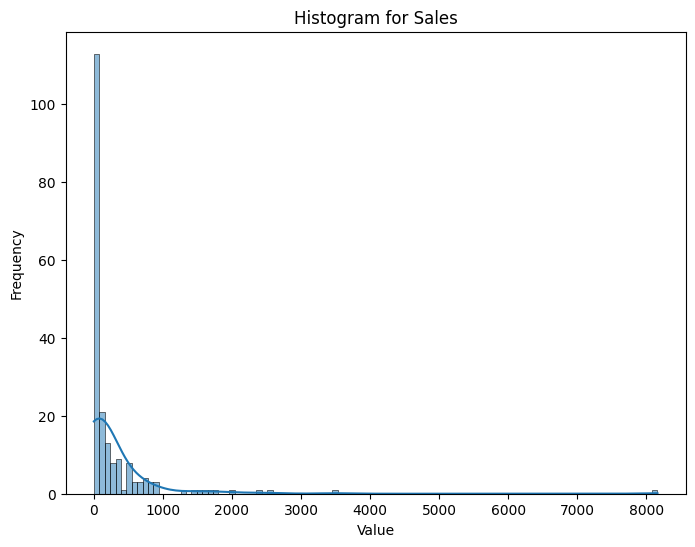

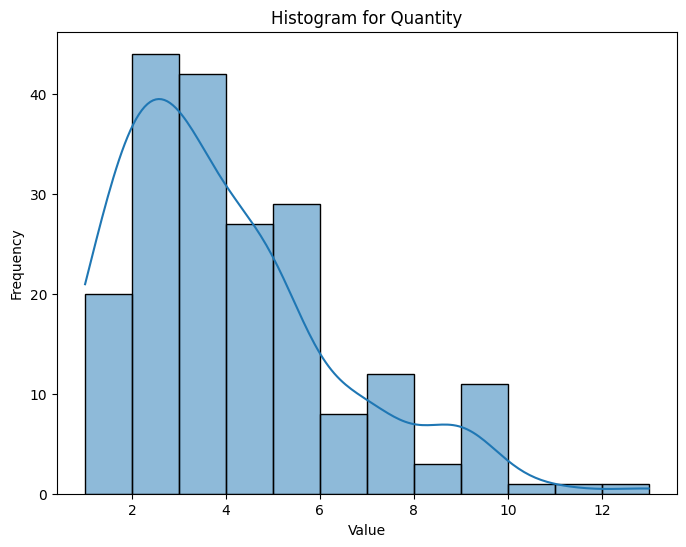

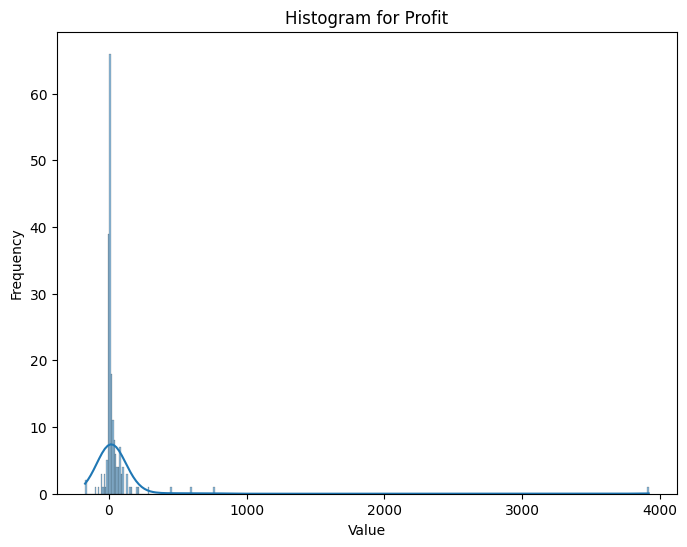

In [1106]:
# print histogram for Sales
plot_histogram(df_super_store, 'Sales')

# print histogram for Quantity
plot_histogram(df_super_store, 'Quantity')

# print histogram for Profit
plot_histogram(df_super_store, 'Profit')

### 2.5 Handling missing values in the dataset: Identify methods for cleaning the dataset.


#### 2.5.1 discover the null

In [1107]:
# Check for null values in the dataframe

df_super_store.isnull().sum()


Row ID            0
Order ID          1
Order Date        2
Ship Date         3
Ship Mode         4
Customer ID       0
Customer Name     3
Segment           3
Country           4
City              2
State             4
Postal Code       3
Region            3
Product ID        2
Category          2
Sub-Category      4
Product Name      3
Sales             1
Quantity          5
Discount          3
Profit           11
dtype: int64

In [1108]:
# Summarize missing/null values in dataframe
df_super_store.isna().sum()

Row ID            0
Order ID          1
Order Date        2
Ship Date         3
Ship Mode         4
Customer ID       0
Customer Name     3
Segment           3
Country           4
City              2
State             4
Postal Code       3
Region            3
Product ID        2
Category          2
Sub-Category      4
Product Name      3
Sales             1
Quantity          5
Discount          3
Profit           11
dtype: int64

I decided to remove all nulls due to the number of nulls compared to the total number of records being so small.
in other situations, I could use it to fill null with Mean median, mode, or interpolation. the biggest number of null values in **"Profit"** 11 records that represent 11/9993 ~ 0.11 %, not even 1% so I can remove null and data will not be affected

In [1109]:
# Drop any rows that contain missing/null values
# inplace=True edits the dataframe directly without needing to reassign
df_super_store.dropna(inplace=True)

# Drop rows where any value is null/NaN
# Faster than filtering each column individually for nulls


In [1110]:
# ReCheck for null values in the dataframe
df_super_store.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [1111]:
# ReCheck for NA values in the dataframe
df_super_store.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### 2.5.2 Remove unimportant columns
some columns is not important and no need to use it in Building the LM
for example 'Row ID'
also it is possible that remove either customer id, or customer name because each of them represent the same  
for now I will remove RowID and later I will decide to remove more column or merge column customer name and id

In [1112]:
del df_super_store['Row ID']

#### 2.5.3 discover the values that expected to be number like Quantity, Sales, Profit

##### 2.5.3.1 Convert Quantity to numberic

In [1113]:
# Get the unique values from the 'Quantity' column of the df_super_store dataframe
df_super_store['Quantity'].unique()

array(['5', '4', '8', 'Two', '6', '7', '3', 'Seven', '9', '12', '2',
       'ten', '10', '7?', '1', '14', '13', '11'], dtype=object)

In [1114]:
# Replace text values in Quantity column with numeric values
df_super_store['Quantity'] = df_super_store['Quantity'].replace('Two', 2)

# Replace text 'Seven' with numeric 7
df_super_store['Quantity'] = df_super_store['Quantity'].replace('Seven', 7)

# Replace text 'ten' with numeric 10
df_super_store['Quantity'] = df_super_store['Quantity'].replace('ten', 10)

# Replace text '7?' with numeric 7
df_super_store['Quantity'] = df_super_store['Quantity'].replace('7?', 7)


# Convert Quantity column to numeric datatype
df_super_store['Quantity'] = pd.to_numeric(df_super_store['Quantity'], errors='raise')


#### 2.5.4 create method to check the values of a column in dataframe that not numberic

In [1115]:
def check_non_numeric_values(dataframe, column_name):
    """Checks for non-numeric values in a dataframe column
    Args:
        dataframe: The dataframe to check
        column_name: The column name to check
    Returns:
        non_numeric_values: Values that are non-numeric in the given column
    - Converts the column values to string
    - Uses regex to check which values don't match a numeric format
    - Returns the non-matching values
    """

    # Convert column to string
    str_column = dataframe[column_name].astype(str)

    # Check which values don't match a numeric format using regex
    non_numeric_mask = ~str_column.str.match(r'^-?[0-9.]+$', na=False)

    # Return the non-numeric values
    non_numeric_values = dataframe.loc[non_numeric_mask, column_name]

    return non_numeric_values


In [1116]:
# Get the unique values from the 'Quantity' column of the df_super_store dataframe
df_super_store['Quantity'].unique()

array([ 5,  4,  8,  2,  6,  7,  3,  9, 12, 10,  1, 14, 13, 11])

In [1117]:
# Get the unique values from the 'Profit' column of the df_super_store dataframe
df_super_store['Profit'].unique()

array(['-6599.978', '-3839.9904', '-3701.8928', ..., '5039.9856',
       '6719.9808', '8399.976'], dtype=object)

Check which values are not numeric in Profit

In [1118]:
# Check for non-numeric values in the 'Profit' column of the df_super_store dataframe
print(check_non_numeric_values(df_super_store, 'Profit'))

5    "-2639.9912"
Name: Profit, dtype: object


In [1119]:
#remove the extra double-quote and covert all values to numberic

df_super_store['Profit'] = pd.to_numeric(df_super_store['Profit'].str.strip('"').str.replace('"', ''), errors='raise')


#### 2.5.5 Check the data types after conversion

In [1120]:
# Print the data types of each column
# This will show what type of data each column contains (integer, string, float, etc.)
print(df_super_store.dtypes)

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code       object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


#### 2.5.6 check the NA values and clean it

In [1121]:
# Summarize missing/null values in dataframe
df_super_store.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### 2.5.6 check the description after fix the some columns

In [1122]:
# Print information about the dataframe
df_super_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9939 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9939 non-null   object 
 1   Order Date     9939 non-null   object 
 2   Ship Date      9939 non-null   object 
 3   Ship Mode      9939 non-null   object 
 4   Customer ID    9939 non-null   object 
 5   Customer Name  9939 non-null   object 
 6   Segment        9939 non-null   object 
 7   Country        9939 non-null   object 
 8   City           9939 non-null   object 
 9   State          9939 non-null   object 
 10  Postal Code    9939 non-null   object 
 11  Region         9939 non-null   object 
 12  Product ID     9939 non-null   object 
 13  Category       9939 non-null   object 
 14  Sub-Category   9939 non-null   object 
 15  Product Name   9939 non-null   object 
 16  Sales          9939 non-null   float64
 17  Quantity       9939 non-null   int64  
 18  Discount

In [1123]:
# Describe the dataframe to get summary statistics
# This will show counts, mean, std, min, max etc for numeric columns
# And counts for object columns
df_super_store.describe()


,Sales,Quantity,Discount,Profit
count,9939.000000,9939.000000,9939.000000,9939.000000
mean,226.011777,3.787101,0.154777,30.221163
std,580.428219,2.224326,0.205377,231.627602
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.140000,2.000000,0.000000,1.800550
50%,53.820000,3.000000,0.200000,8.713800
75%,208.072000,5.000000,0.200000,29.544000
max,17499.950000,14.000000,0.800000,8399.976000


### 2.4 Grouping of data: Demonstrate data aggregations or frequency distributions to summarise analysis.

In [1124]:
# Group by Segment
#group by segement to understand the classes of the customer
#the important of the segment is to understand the customer classes

result = df_super_store.groupby('Segment')[['Sales', 'Profit','Quantity','Discount','Category','Sub-Category']].count()
print(result)


             Sales  Profit  Quantity  Discount  Category  Sub-Category
Segment                                                               
%                1       1         1         1         1             1
Consumer      5157    5157      5157      5157      5157          5157
Corporate     3009    3009      3009      3009      3009          3009
Home Office   1772    1772      1772      1772      1772          1772


In [1125]:
# Segment with value '%' looks like it is corrupted data so I will remove it
# it represent only one row
df_super_store = df_super_store[df_super_store['Segment']!= '%']

In [1126]:
# Group the dataframe df_super_store by the 'Category' column
# Sum the 'Sales' values for each category
# This will return the total sales per category
df_super_store.groupby('Category')['Sales'].sum()

Category
Frnture              4323.3840
Furniture          723624.7352
Office Supplies    709413.3960
Technology         808569.9960
Name: Sales, dtype: float64

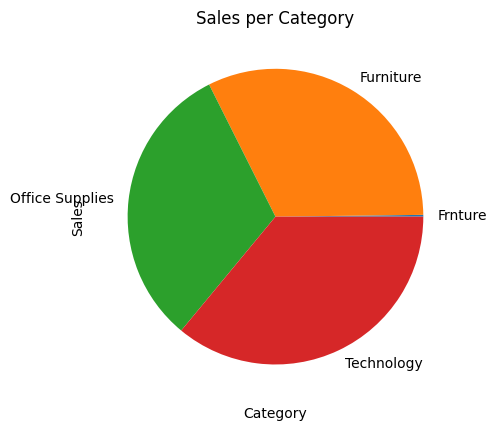

In [1127]:
# Group dataframe by Category column and sum Sales column
# This aggregates the total sales by category
df_super_store.groupby('Category')['Sales'].sum()

# Plot pie chart of aggregated sales data
# Kind is set to 'pie' to create a pie chart
df_super_store.groupby('Category')['Sales'].sum().plot(kind='pie')

# Add labels and title
plt.xlabel('Category') # X label is Category
plt.ylabel('Sales') # Y label is Sales
plt.title('Sales per Category') # Chart title

# Display the plot
plt.show() # Show the plotted pie chart


it looks like the Furniture and frniture are the same and there is misspelling in data so it need to fixed

In [1128]:
# change Category value of Frnture to Furniture

# This code is replacing the value 'Frnture' in the 'Category' column
# with the value 'Furniture'.

# df_super_store is the dataframe that contains the product data
# We are accessing the 'Category' column of this dataframe

# The .replace() method is being used to find the string 'Frnture'
# and replace it with 'Furniture' in the 'Category' column

# After running this code, any rows that previously had
# 'Frnture' in the 'Category' column will now have 'Furniture'

df_super_store['Category'] = df_super_store['Category'].replace('Frnture', 'Furniture')

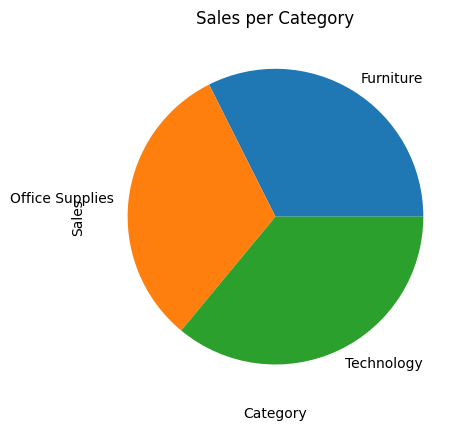

In [1129]:
# Group the dataframe by Category and sum the Sales column
# Plot the summed Sales data as a pie chart
df_super_store.groupby('Category')['Sales'].sum().plot(kind='pie')

# Add label to the x-axis
plt.xlabel('Category')

# Add label to the y-axis
plt.ylabel('Sales')

# Add a title to the chart
plt.title('Sales per Category')

# Display the plotted pie chart
plt.show()


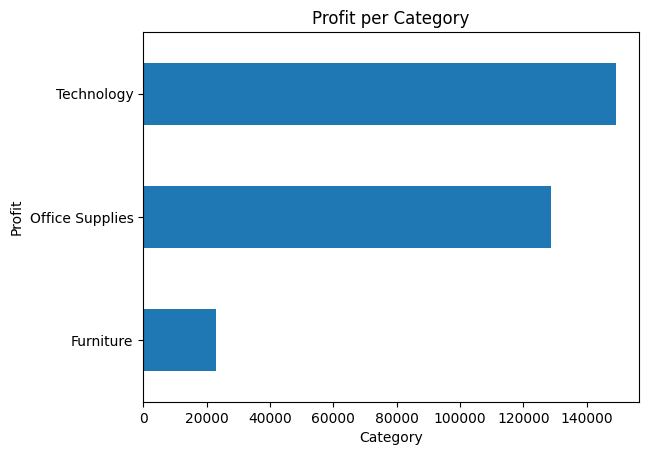

In [1130]:
# Make a copy of the dataframe to avoid modifying original
numberic_profit = df_super_store.copy()

# Convert 'Profit' column to numeric and handle non-numeric values
numberic_profit['Profit'] = pd.to_numeric(df_super_store['Profit'], errors='coerce')

# Group dataframe by 'Category' column and sum 'Profit' values
# Plot horizontal bar chart of total profit per category
numberic_profit.groupby('Category')['Profit'].sum().plot(kind='barh')

# Add labels and title to plot
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Profit per Category')

# Display plot
plt.show()


**The furniture is a lower category in terms of sales and also in terms of profit, so it may be a decision not to sell it in that category.**

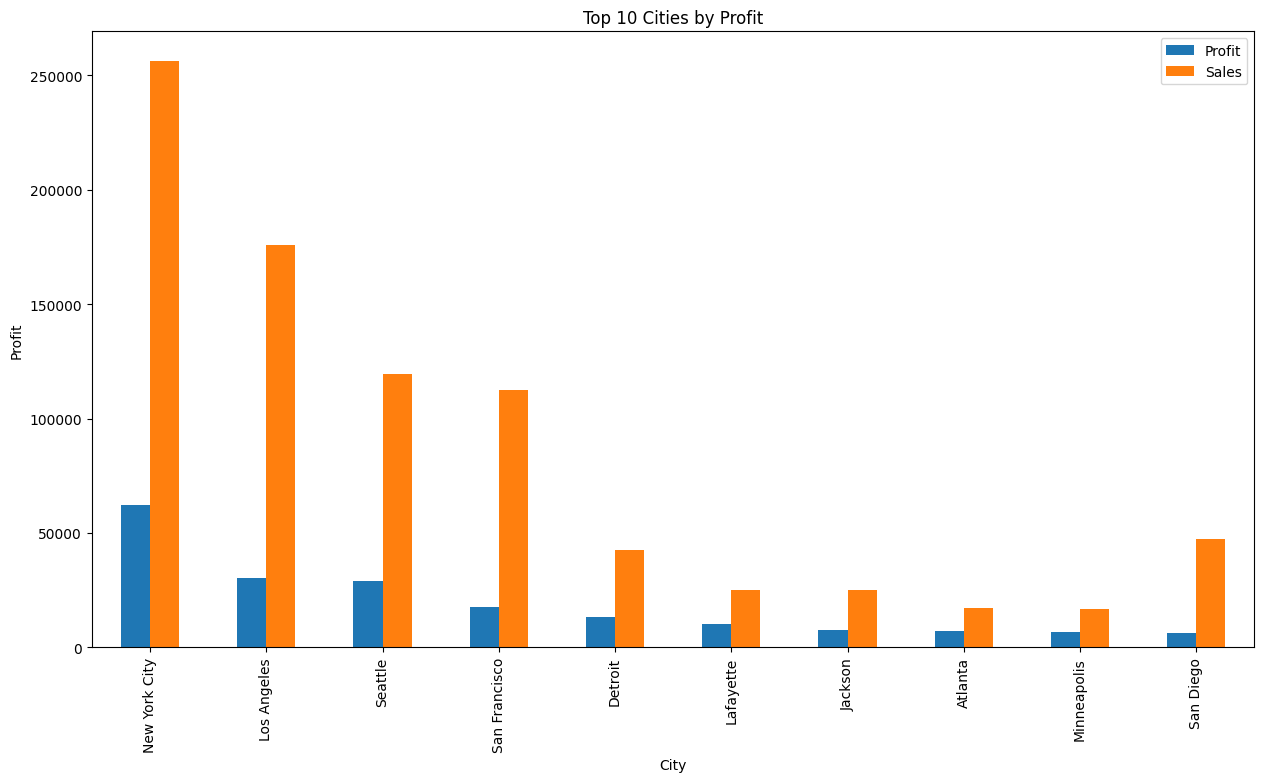

In [1131]:
# Get insights about top 10 cities in sales and profit
profit_by_city = numberic_profit.groupby('City')[['Profit', 'Sales']].sum()

# Group the data by City and sum the Profit and Sales columns
# to get total profit and sales for each city

# Sort the results by Profit in descending order
profit_by_city_sorted = profit_by_city.sort_values(by='Profit', ascending=False)

# Sort the grouped data with highest profit cities at the top

# Select the top 10 cities
top_10_cities = profit_by_city_sorted.head(10)

# Take the top 10 rows to focus on the most profitable cities

# Plot the bar chart
ax = top_10_cities.plot(kind='bar', figsize=(15, 8))

# Create a bar chart to visualize the profit data
# for the top 10 cities

plt.xlabel('City')
plt.ylabel('Profit')
plt.title('Top 10 Cities by Profit')

# Add labels and title to the chart

plt.show()

# Display the plotted chart


In [1132]:
# Group the dataframe df_super_store by the 'Country' column
# Count the number of rows for each country across the specified columns:
# - 'Sales'
# - 'Profit'
# - 'Quantity'
# - 'Discount'
result = df_super_store.groupby('Country')[['Sales', 'Profit','Quantity','Discount']].count()

# Print the result which will show the count for each country
print(result)


               Sales  Profit  Quantity  Discount
Country                                         
56                 1       1         1         1
US                 1       1         1         1
United States   9936    9936      9936      9936


In [1133]:
# Drop the 'Country' column since it doesn't provide any useful information
del df_super_store['Country']

# The 'us' value in the 'Country' column likely refers to the country 'United States'
# However, to be clear it would be better to change it to the standard country code 'USA'

# Additionally, the value '56' in the 'Country' column doesn't seem to be a valid country code
# This row should probably be investigated further

because all of sales inside USA then try to group by city and also segment to understand the customer discrimination

In [1134]:
# Group the dataframe df_super_store by the 'City' column
# Count the number of rows for the selected columns:
# 'Sales', 'Profit','Quantity','Discount'

result = df_super_store.groupby('City') [[ 'Sales', 'Profit','Quantity','Discount']].count()



# Print out the result which will show the count of rows
# for each city for the selected columns
print(result)

# This groups the dataframe by City and counts the number of rows
# for each city for the Sales, Profit, Quantity and Discount columns.
# The result will show the counts for each city across those columns.


             Sales  Profit  Quantity  Discount
City                                          
Aberdeen         1       1         1         1
Abilene          1       1         1         1
Akron           20      20        20        20
Albuquerque     14      14        14        14
Alexandria      16      16        16        16
...            ...     ...       ...       ...
Woonsocket       4       4         4         4
Yonkers         15      15        15        15
York             5       5         5         5
Yucaipa          1       1         1         1
Yuma             4       4         4         4

[531 rows x 4 columns]


In [1135]:
# Group the dataframe df_super_store by the columns 'City' and 'Segment'
# Sum the values in the columns 'Sales', 'Profit', 'Quantity', and 'Discount'
# for each unique combination of 'City' and 'Segment'

result = df_super_store.groupby(['City', 'Segment'])[[ 'Sales', 'Profit', 'Quantity','Discount']].sum()



# Print out the grouped result which contains the summed values
# for each metric by City and Segment
print(result)


                         Sales    Profit  Quantity  Discount
City     Segment                                            
Aberdeen Consumer       25.500    6.6300         3       0.0
Abilene  Consumer        1.392   -3.7584         2       0.8
Akron    Consumer      664.164  -95.6766        38       4.6
         Corporate    1821.872  -37.3386        16       1.8
         Home Office    22.926    1.6356         9       0.9
...                        ...       ...       ...       ...
Yonkers  Home Office   216.400   94.6252         8       0.0
York     Corporate     817.978 -102.1692        19       2.1
Yucaipa  Corporate      50.800   13.2080         5       0.0
Yuma     Corporate     196.024   49.8819        11       0.4
         Home Office   644.841 -515.8728        11       1.4

[1026 rows x 4 columns]


In [1136]:
# Group the dataframe df_super_store by the 'Region' column
# This will group all rows that have the same region value together

# Aggregate (sum) the columns 'Sales', 'Profit', 'Quantity', and 'Discount'
# for each group (region)
# The sum() method calculates the sum of values in each group

# Assign the grouped and aggregated dataframe to the variable result
result = df_super_store.groupby(['Region'])[['Sales', 'Profit', 'Quantity','Discount']].sum()

# Print the result to see the summed values for each metric
# by region
print(result)


               Sales       Profit  Quantity  Discount
Region                                               
Central  491691.0252   45347.5955      8660    544.38
Centrl     1137.5380   -1251.6690        12      1.90
Cntral     1161.8330    -471.8704        17      2.10
East     663689.6090  102556.4598     10511    403.20
Est        5854.8040   -7988.5589        34      4.20
South    356069.9155   55374.0360      6164    234.40
Southh     3970.4700   -1976.5331         8      1.20
West     722356.3165  109338.0327     12230    346.25


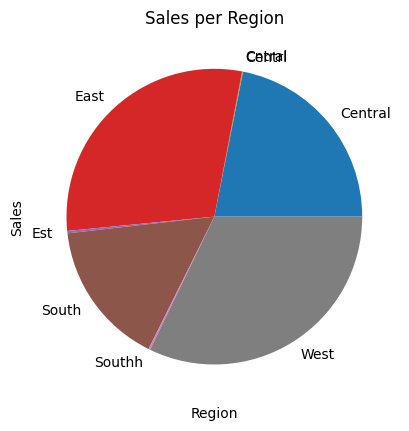

In [1137]:
# Group the dataframe by Region column
# Plot the summed Sales values as a pie chart

df_super_store.groupby('Region')['Sales'].sum().plot(kind='pie')

# Add label to the x-axis
plt.xlabel('Region')

# Add label to the y-axis
plt.ylabel('Sales')

# Add a title to the plot
plt.title('Sales per Region')

# Display the plotted pie chart
plt.show()


In [1138]:
# Group the dataframe by 'Product Name' column
# Count the number of rows for each unique 'Product Name' value
# Select the 'Sales', 'Profit', 'Quantity', and 'Discount' columns to count
# This will return a dataframe with the count of rows for each product
# Across the selected columns
# Useful to understand how many data points/orders there are for each product

df_super_store.groupby('Product Name')[['Sales', 'Profit', 'Quantity','Discount']].count()


,Sales,Profit,Quantity,Discount
Product Name,,,,
"""While you Were Out"" Message Book, One Form per Page",3,3,3,3
"#10 Gummed Flap White Envelopes, 100/Box",4,4,4,4
#10 Self-Seal White Envelopes,4,4,4,4
"#10 White Business Envelopes,4 1/8 x 9 1/2",7,7,7,7
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",10,10,10,10
...,...,...,...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",5,5,5,5
iOttie HLCRIO102 Car Mount,5,5,5,5
iOttie XL Car Mount,2,2,2,2


**This can lead having 5~10 big cities in terms of numbers like New Youk, LA, Philadelphia, San Francisco**

In [1139]:
# Group the dataframe by the 'Segment' column
# Count the number of rows for each segment across the specified columns:
# - 'Sales'
# - 'Profit'
# - 'Quantity'
# - 'Discount'
# This will return the count of records for each unique segment value
# Across the selected metrics, to understand how data is distributed
# Between different customer segments

df_super_store.groupby('Segment')[['Sales', 'Profit', 'Quantity','Discount']].count()


,Sales,Profit,Quantity,Discount
Segment,,,,
Consumer,5157,5157,5157,5157
Corporate,3009,3009,3009,3009
Home Office,1772,1772,1772,1772


In [1140]:
# Import the Plotly library for using it to plot treemap
!pip install plotly


In [1141]:
import plotly.express as px

# Import plotly express for data visualization

# get some insights for category and segment

result = df_super_store.groupby(['City', 'Segment']).size().reset_index(name='Count')

# Group the dataframe by City and Segment and count the number of rows
# Reset the index and name the count column 'Count'

# Plotting the treemap
fig = px.treemap(result, path=['City', 'Segment'], values='Count', title='Count by City and Segment')

# Create a treemap figure from the result dataframe
# Specify City and Segment as the hierarchical path
# Use the 'Count' column for the values
# Add a title to the chart

fig.show()

# Display the treemap figure



from the data I noticed that there is record with value not correct and it is only one record so I will remove it
the row as following

Segment = '%' looks like not correct values so I will remove it

In [1142]:
# Group the dataframe by Category and Segment columns
# Count the number of rows for each unique combination of Category and Segment
# Reset the index and name the count column 'Count'
result = df_super_store.groupby(['Category','Segment']).size().reset_index(name='Count')

# Create a treemap visualization using Plotly Express
# The treemap will show the count of items by nested Category and Segment groups
# Set the path to show the hierarchy of Category then Segment
# Set the values to be the 'Count' column
# Set the title of the chart
fig = px.treemap(result, path=['Category', 'Segment'], values='Count', title='Count by Category and Segment')

# Display the treemap
fig.show()


In [1143]:
# Group the dataframe by Segment and Product Name columns
# Count the number of rows for each unique combination of Segment and Product Name
# Reset the index and name the count column 'Count'
result = df_super_store.groupby(['Segment','Product Name']).size().reset_index(name='Count')

# Create a treemap visualization using Plotly Express
# The treemap will show the count of items by nested Segment and Product Name categories
# Set the path (hierarchy) to be Segment then Product Name
# Set the values to be the 'Count' column
# Set the title of the plot
fig = px.treemap(result, path=['Segment','Product Name'], values='Count', title='Count by Category and Segment')

# Display the treemap
fig.show()


In [1144]:

# Discover the total sales amounts for each Sub-Category within each Category
# This helps analyze the performance and size of each sub-segment

df_super_store.groupby(['Category','Sub-Category']).sum()

<ipython-input-1144-3d673965ccaf>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Sales  Quantity  Discount      Profit
Category        Sub-Category                                             
Furniture       Bookcases     112386.1677       851     47.03  -2872.6610
                Chairs        326901.1600      2343    104.10  26709.6704
                Furnishings    91600.9720      3554    131.20  13172.9484
                Tables        197059.8195      1193     78.80 -13933.3068
Office Supplies Appliances    107403.6850      1716     75.20  18475.8830
                Art            27118.7920      3000     59.60   6527.7870
                Binders       197411.7690      5922    559.40  35770.1427
                Envelopes      16473.1380       904     20.20   6963.0751
                Fasteners       3024.2800       914     17.80    949.5182
                Labels         12411.1320      1394     25.00   5510.9194
                Paper          78479.2060      5178    102.60  34053.5693
                Storage       220603.2320      3125     61.80  21708.6570
                Supplies       46488.1620       645     14.40  -1154.3415
Technology      Accessories   167380.3180      2976     60.80  41936.6357
                Copiers       149528.0300       234     11.00  55617.8249
                Machines      166020.6200       427     33.30   6007.1787
                Phones        325641.0280      3260    135.40  45483.9921

In [1145]:
# Group the dataframe df_super_store by the columns 'Category' and 'Sub-Category'
# Sum the values in the 'Profit' column for each unique combination of Category and Sub-Category

n_by_category_subcategory = df_super_store.groupby(['Category', 'Sub-Category']) ['Profit'].sum()



# Print the results to see the total Profit for each Category-SubCategory combination
print (n_by_category_subcategory)


Category         Sub-Category
Furniture        Bookcases       -2872.6610
                 Chairs          26709.6704
                 Furnishings     13172.9484
                 Tables         -13933.3068
Office Supplies  Appliances      18475.8830
                 Art              6527.7870
                 Binders         35770.1427
                 Envelopes        6963.0751
                 Fasteners         949.5182
                 Labels           5510.9194
                 Paper           34053.5693
                 Storage         21708.6570
                 Supplies        -1154.3415
Technology       Accessories     41936.6357
                 Copiers         55617.8249
                 Machines         6007.1787
                 Phones          45483.9921
Name: Profit, dtype: float64


In [1146]:
# Group the dataframe df_super_store by the column 'Ship Mode'
# Summarize the columns 'Sales', 'Profit', 'Quantity', and 'Discount'
# by taking the sum of each column for each unique value in 'Ship Mode'
# This will provide totals for Sales, Profit, Quantity, and Discount
# for each shipping mode

#group by ship mode with respect to profit and sales

df_super_store.groupby('Ship Mode')[['Sales', 'Profit', 'Quantity','Discount']].sum()

# Group the data and calculate sums to analyze performance by shipping mode
# and see which modes generate the most sales and profit


,Sales,Profit,Quantity,Discount
Ship Mode,,,,
First Class,3.489612e+05,50411.2283,5665,249.67
Same Day,1.282171e+05,15904.5374,1959,82.55
Second Class,4.516190e+05,60668.5704,7380,266.43
Standard Class,1.317134e+06,173943.1565,22632,938.98


the "**Standard class**" is the most sales and profit

### 2.2 Outlier treatment: Identify abnormal or problematic values and apply methods to treat them.

In [1147]:
def clean_outliers_inplace(df, column_name,method='remove'):

  display_boxplot(df, column_name,'Boxplot with Outliers')
  # Detect outliers
  outliers = detect_outliers(df, column_name)
  #remove outliers
    # Choose method for handling outliers
  if method == 'remove':
      # Option 1: Remove outliers
      remove_outliers(df, outliers)
  elif method == 'interpolate':
      # Option 2: Interpolate outliers
      interpolate_outliers(df, outliers , column_name)
  elif method == 'winsorize':
      # Option 3: Winsorize outliers
      winsorize_outliers(df, outliers,  column_name)
  elif method == 'log':
      log_outliers(df, outliers,  column_name)

  display_boxplot(df, column_name,'Boxplot after clean Outliers')

def detect_outliers(df, column_name):
  # Calculate quartiles and IQR
  Q1, Q3 = df[column_name].quantile([0.25, 0.75])
  IQR = Q3 - Q1

  # Define bounds for outliers
  lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

  # Identify and return outliers
  return df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

def remove_outliers(df,outliers):
  # Remove outliers in the original DataFrame
  df.drop(outliers.index, inplace=True)

  # Reset index after dropping rows
  df.reset_index(drop=True, inplace=True)

def interpolate_outliers(df, outliers , column_name):
    # Interpolate outliers using linear interpolation
     # Interpolate outliers using linear interpolation
    df.loc[outliers.index, column_name] = df.loc[outliers.index, column_name].interpolate()

def winsorize_outliers(df, outliers , column_name):
    # Winsorize outliers by setting them to the 5th and 95th percentiles
    lower_bound, upper_bound = np.percentile(df[column_name], [5, 95])
    # Clip values outside the bounds for outliers only
    df.loc[outliers.index, column_name] = np.clip(df.loc[outliers.index, column_name], lower_bound, upper_bound)


def log_outliers(df, outliers , column_name):
    # Option: Log transformation
      # Option: Log transformation for outliers only
    df.loc[outliers.index, column_name] = np.log1p(df.loc[outliers.index, column_name])



def display_boxplot(df, column_name,title):
  # Display the boxplot
  plt.figure(figsize=(8, 6))
  sns.boxplot(df[column_name])
  plt.title(title)
  plt.show()

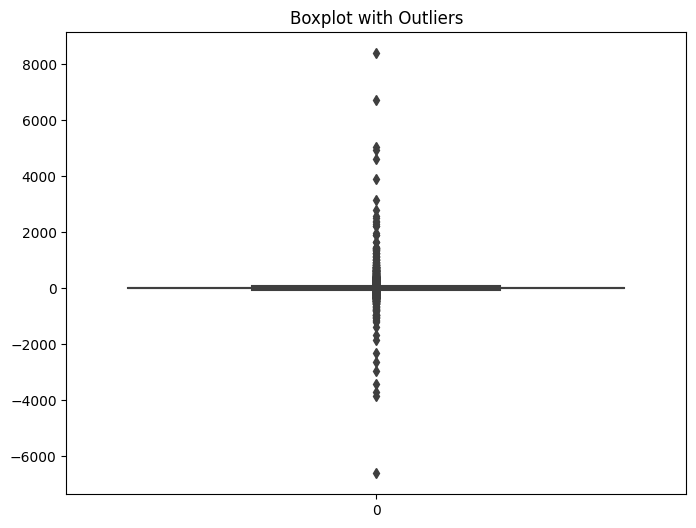

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in log1p



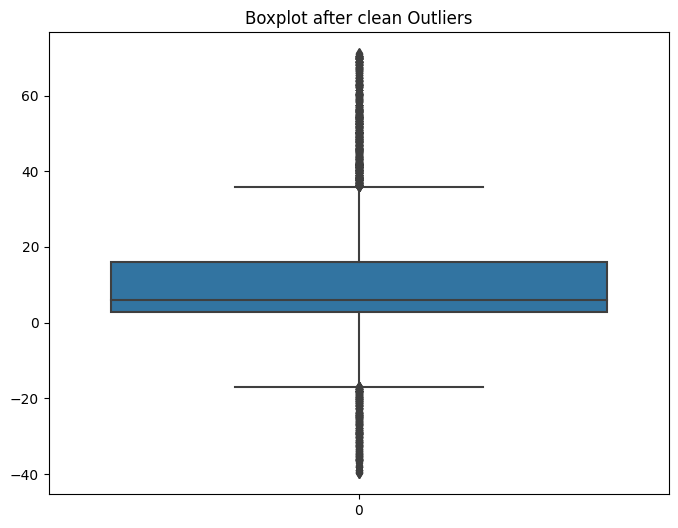

In [1148]:
clean_outliers_inplace(df_super_store.copy(), 'Profit','log')

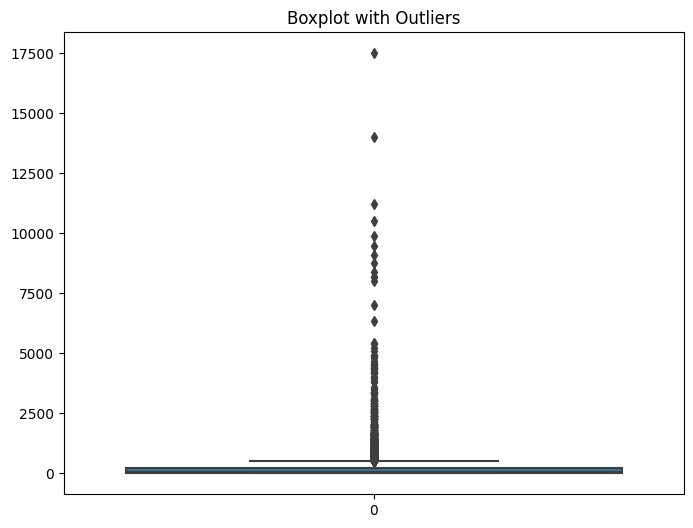

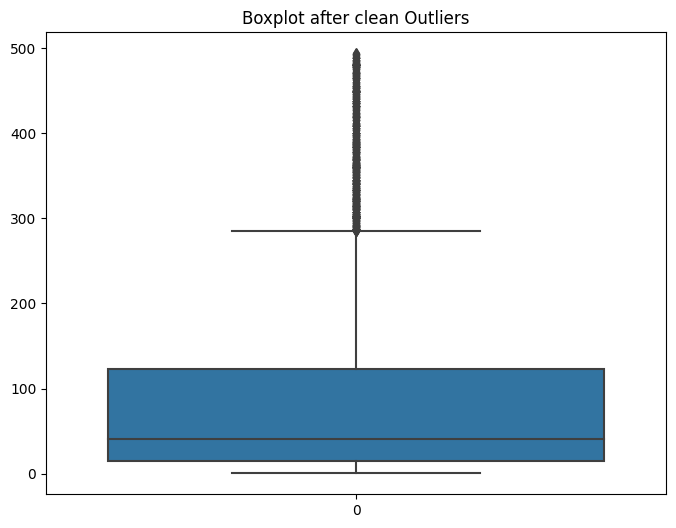

In [1149]:
# Clean outliers from the 'Sales' column of the dataframe
# df_super_store is the dataframe containing sales data
# The clean_outliers_inplace function cleans outliers in the specified column inplace (modifies the original dataframe)
# This removes any extreme or anomalous values from the sales data
# That could skew results of any analysis performed on that column
clean_outliers_inplace(df_super_store, 'Sales')


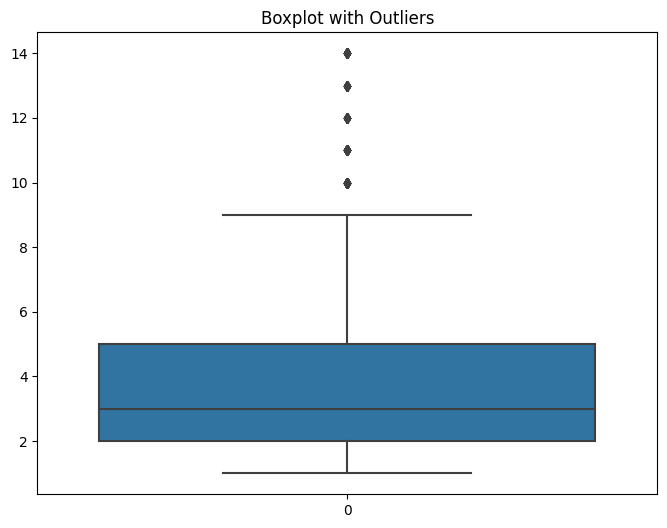

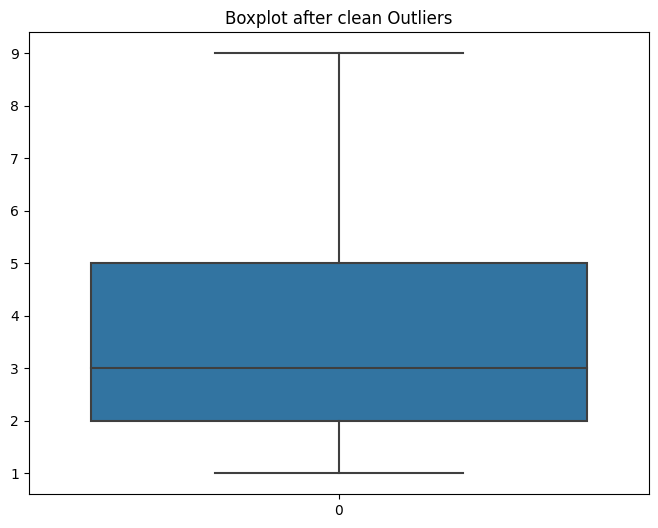

In [1150]:
# Clean outliers from the 'Quantity' column of the dataframe
# df_super_store is the dataframe that contains sales data
# The clean_outliers_inplace function cleans outliers in the specified column inplace (modifies the original dataframe)
# Quantity likely contains product sales quantities that could have some extreme outlier values
# Removing outliers from this column will make subsequent analysis more robust
# By cleaning inplace, we don't need to assign the returned dataframe back to a variable
clean_outliers_inplace(df_super_store, 'Quantity')


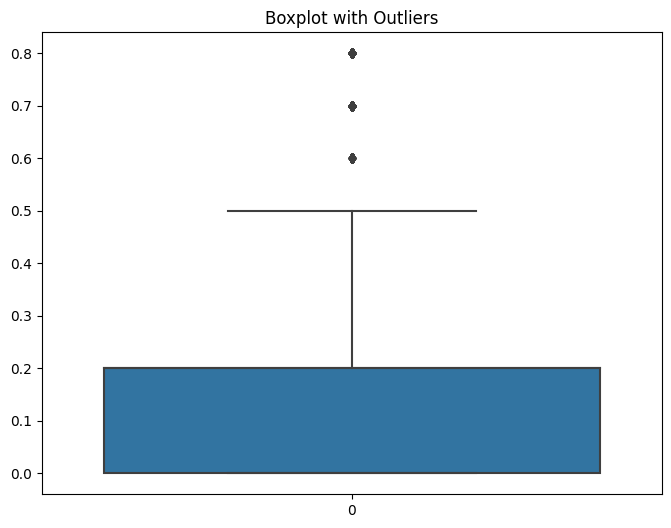

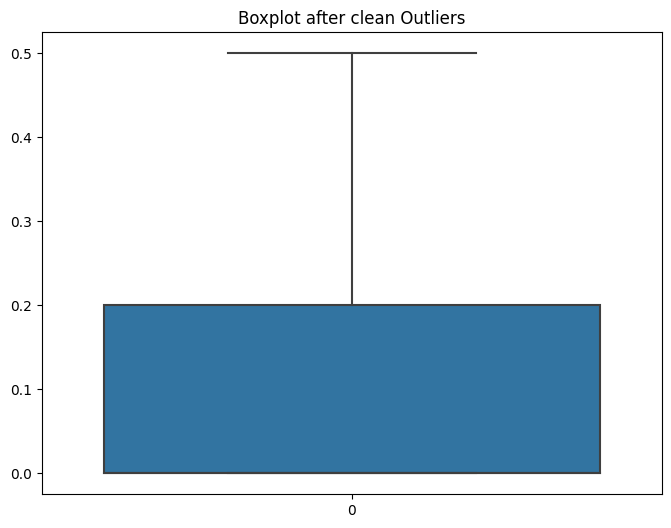

In [1151]:
# Clean outliers from the 'Discount' column of the dataframe
# df_super_store is the dataframe that contains sales data
# The clean_outliers_inplace function cleans outliers in the specified column inplace (modifies the original dataframe)
# Discount values that are outliers based on some criteria will be removed/replaced
# This prepares the Discount data by removing unrealistic/erroneous values
# So we have clean data for analysis and modeling

clean_outliers_inplace(df_super_store, 'Discount')


### 2.3 Normalising and scaling (numerical variables): Apply normalisation and scaling methods to transform data for further analysis.

In [1152]:
# Select only numeric columns for scaling
numeric_cols = df_super_store.select_dtypes(include=['number']).columns

# Filter dataframe to only include numeric columns
df_numeric = df_super_store[numeric_cols]

# Normalising and scaling using Min-Max Scaling
# MinMaxScaler scales features between 0 and 1
scaler_minmax = MinMaxScaler()

# Fit and transform data using MinMaxScaler
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df_numeric), columns=df_numeric.columns)

# Normalising and scaling using  Z-score Standardization
# StandardScaler scales features to have mean=0 and variance=1
scaler_standard = StandardScaler()

# Fit and transform data using StandardScaler
df_standard = pd.DataFrame(scaler_standard.fit_transform(df_numeric), columns=df_numeric.columns)

# Print transformed dataframes
print(df_minmax)
print(df_standard)


         Sales  Quantity  Discount    Profit
0     0.977725     0.625       1.0  0.000000
1     0.973708     0.250       1.0  0.173840
2     0.763719     0.500       1.0  0.182135
3     0.738360     0.500       1.0  0.208123
4     0.915870     0.500       1.0  0.214346
...        ...       ...       ...       ...
7850  0.910839     0.250       0.0  0.967008
7851  0.971761     0.375       0.0  0.975290
7852  0.971700     0.250       0.0  0.998584
7853  0.995192     0.500       0.0  1.000000
7854  0.995192     0.500       0.0  1.000000

[7855 rows x 4 columns]
         Sales  Quantity  Discount     Profit
0     3.360148  1.329623  3.540916 -11.009845
1     3.342902 -0.247096  3.540916  -8.003535
2     2.441313  0.804050  3.540916  -7.860086
3     2.332436  0.804050  3.540916  -7.410661
4     3.094575  0.804050  3.540916  -7.303044
...        ...       ...       ...        ...
7850  3.072974 -0.247096 -0.875979   5.713114
7851  3.334540  0.278477 -0.875979   5.856343
7852  3.334279 -0.247

###2.6 Correlation: Describe features that are related and the nature of that relationship.

In [1153]:
# Select a random sample of 5 rows from the dataframe
df_super_store.sample(5)


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
5754,CA-2017-118542,12/01/2017,12/05/2017,Standard Class,CC-12550,Clay Cheatham,Consumer,Los Angeles,California,90008,West,OFF-PA-10004735,Office Supplies,Paper,Xerox 1905,45.360,7,0.0,21.7728
2405,CA-2014-168592,09/08/2014,14/09/2014,Standard Class,DP-13390,Dennis Pardue,Home Office,San Francisco,California,94110,West,OFF-ST-10002406,Office Supplies,Storage,Pizazz Global Quick File,14.970,1,0.0,4.1916
4068,US-2014-157847,04/02/2014,04/06/2014,Second Class,SC-20020,Sam Craven,Consumer,Houston,Texas,77095,Central,OFF-PA-10002986,Office Supplies,Paper,Xerox 1898,26.720,5,0.2,9.3520
7622,CA-2017-113670,15/10/2017,17/10/2017,First Class,RS-19765,Roland Schwarz,Corporate,Los Angeles,California,90045,West,OFF-PA-10000675,Office Supplies,Paper,Xerox 1919,204.950,5,0.0,100.4255
4612,CA-2017-143259,30/12/2017,01/03/2018,Standard Class,PO-18865,Patrick O'Donnell,Consumer,New York City,New York,10009,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,4,0.2,12.1176


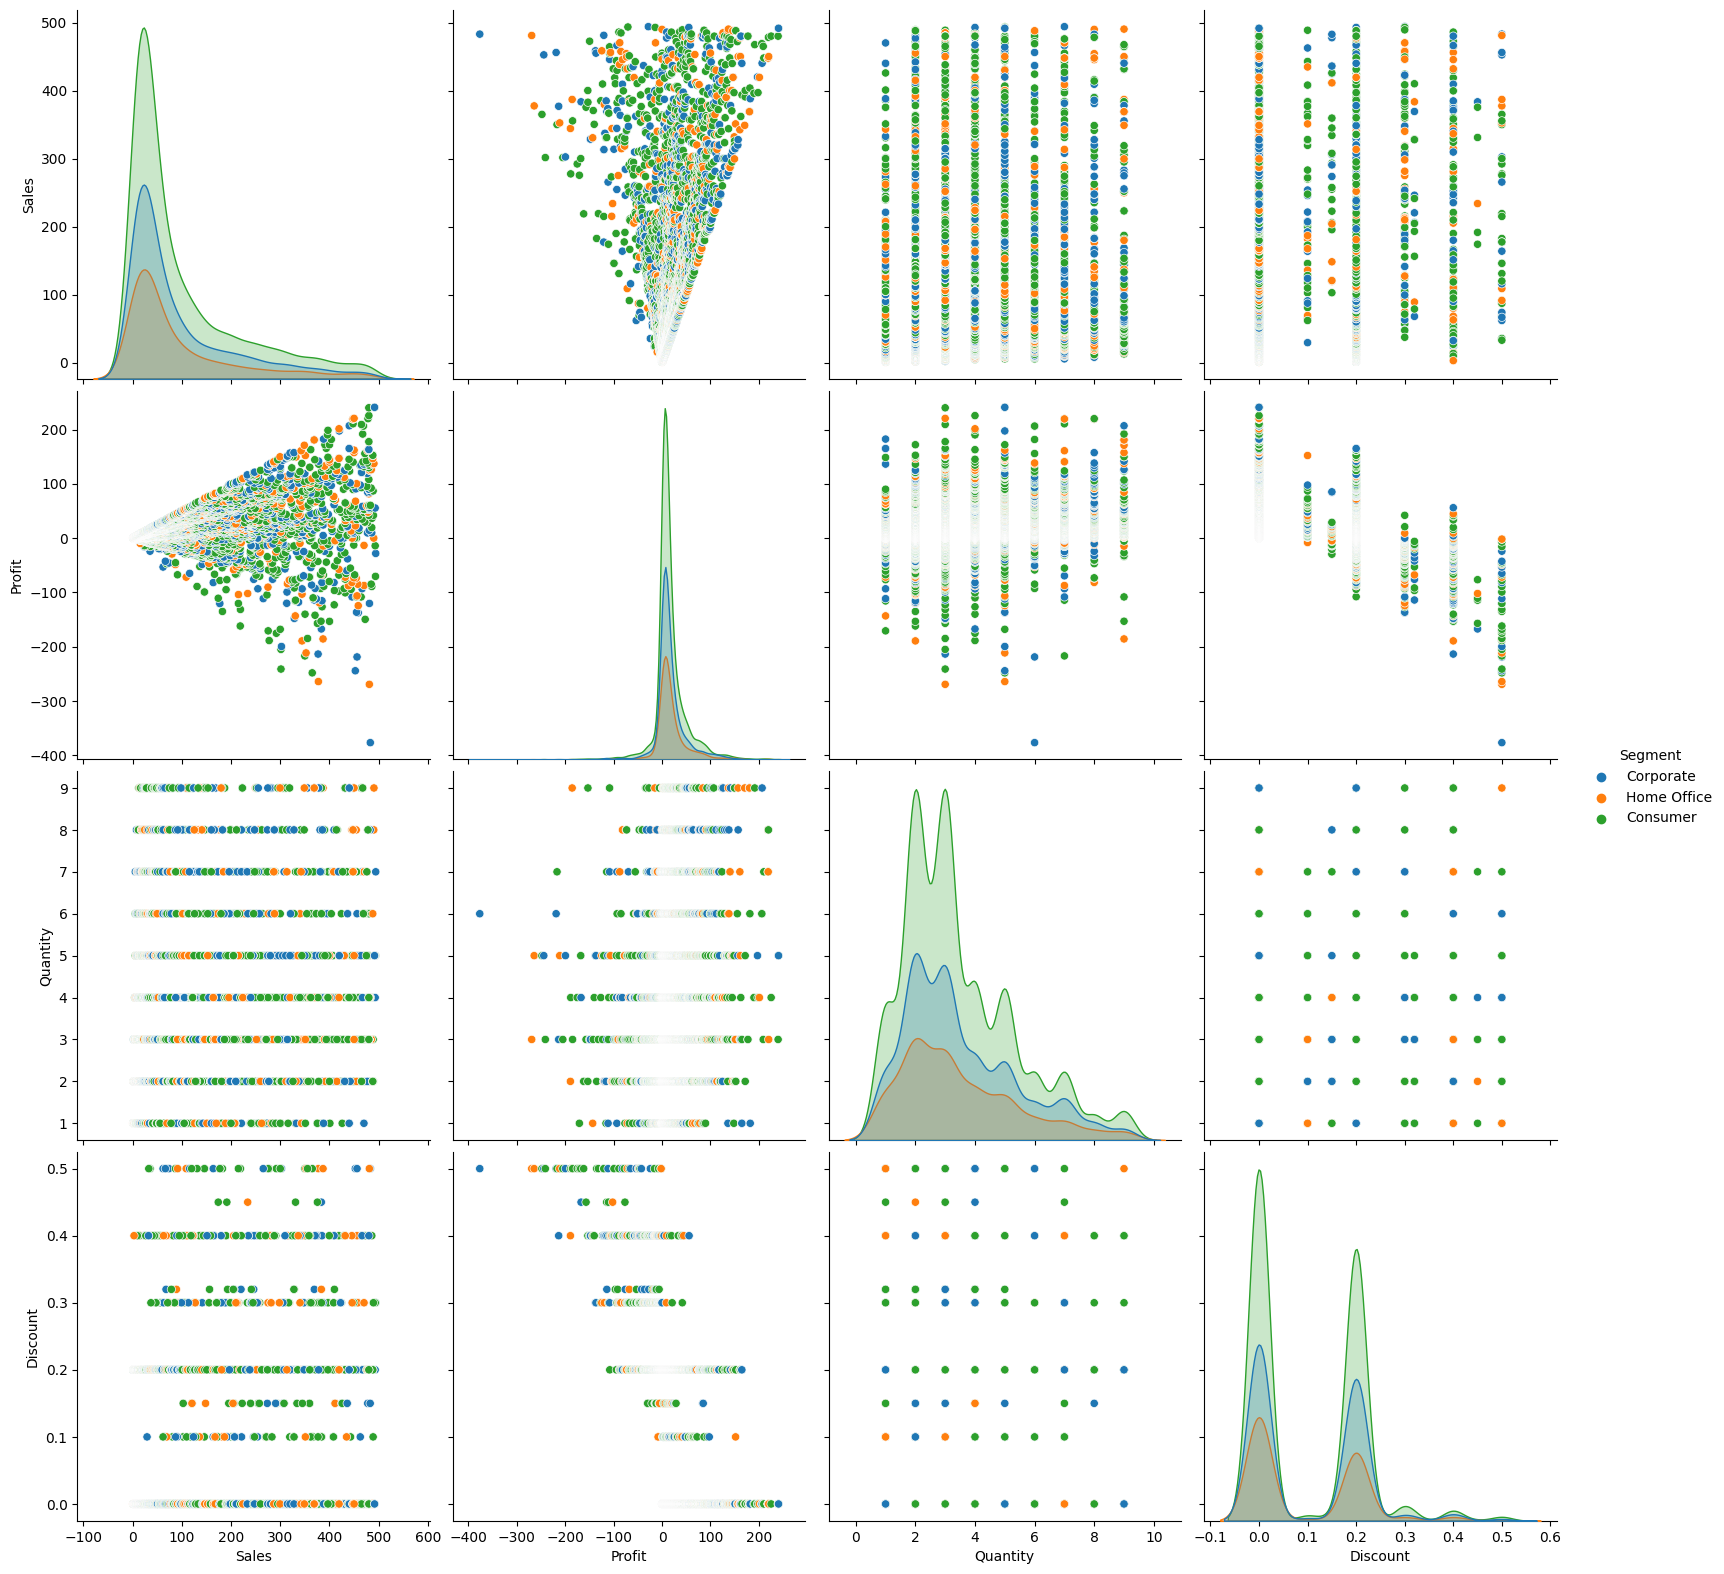

In [1154]:
# Create a pairplot to visualize the relationships between variables
sns.pairplot(df_super_store, hue='Segment', height=4, vars=['Sales', 'Profit','Quantity' ,'Discount'])

In [1155]:
# Create a correlation matrix between all columns in the dataframe
correlation_matrix = df_super_store.corr()

# Print out the correlation matrix
print(correlation_matrix)


             Sales  Quantity  Discount    Profit
Sales     1.000000  0.161172  0.136077  0.339301
Quantity  0.161172  1.000000 -0.033411  0.178148
Discount  0.136077 -0.033411  1.000000 -0.413845
Profit    0.339301  0.178148 -0.413845  1.000000


<ipython-input-1155-e118554cb9af>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

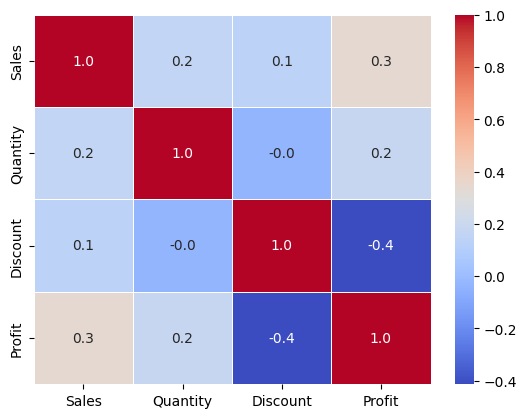

In [1156]:
# Generate a heatmap to visualize the correlation matrix
sns.heatmap(
    correlation_matrix, # The correlation matrix data to plot
    annot=True, # Show the values in the heatmap cells
    cmap='coolwarm', # Color map to use, coolwarm is good for positive and negative values
    fmt='.1f', # Format values to 1 decimal place
    linewidths=.5 # Thickness of grid lines between cells
)


*there is medium correlation between sales and profit 0.6*

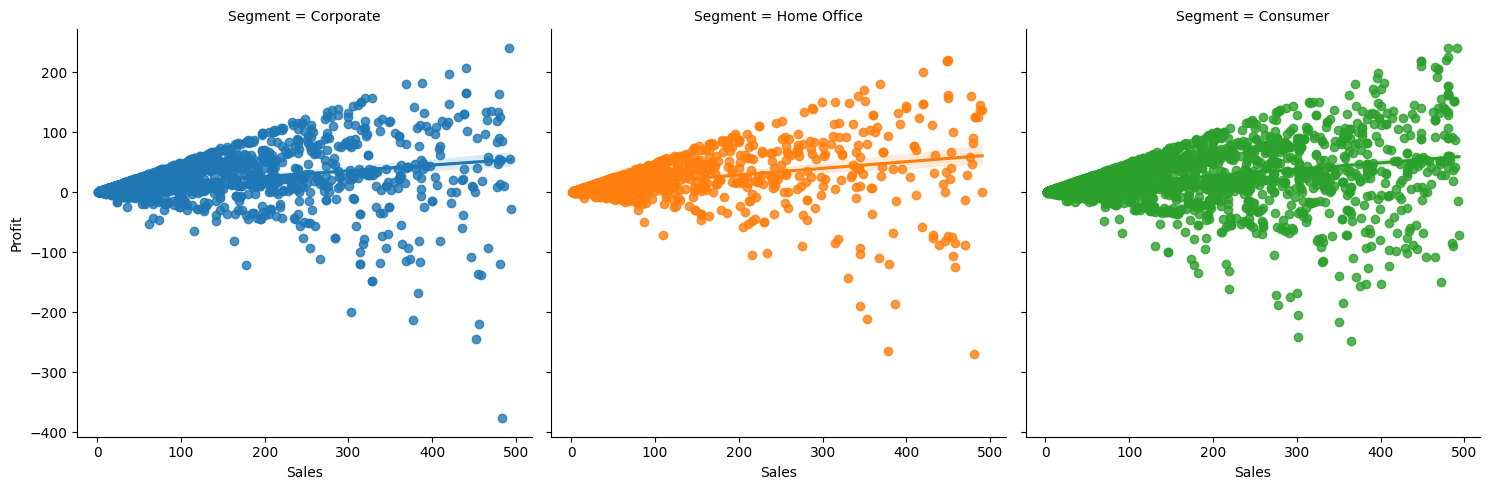

In [1157]:

# Create linear regression plot with Sales on x-axis and Profit on y-axis

sns.lmplot(data=df_super_store, hue='Segment', x='Sales', y='Profit', col='Segment', fit_reg=True, col_wrap=3)
plt.show()

# Display the figure
plt.show()


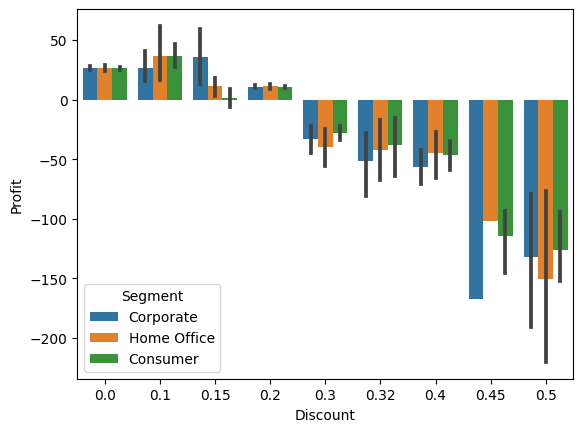

In [1158]:
# check also the relation between the discount and profit
#It make sense when the discount increase the profit decrease

sns.barplot(data=df_super_store, hue='Segment', x='Discount', y='Profit')
plt.show()

It look like there are some outliter let's study them by boxplot

array([[<Axes: title={'center': 'Discount'}, xlabel='[Segment]'>,
        <Axes: title={'center': 'Profit'}, xlabel='[Segment]'>],
       [<Axes: title={'center': 'Quantity'}, xlabel='[Segment]'>,
        <Axes: title={'center': 'Sales'}, xlabel='[Segment]'>]],
      dtype=object)

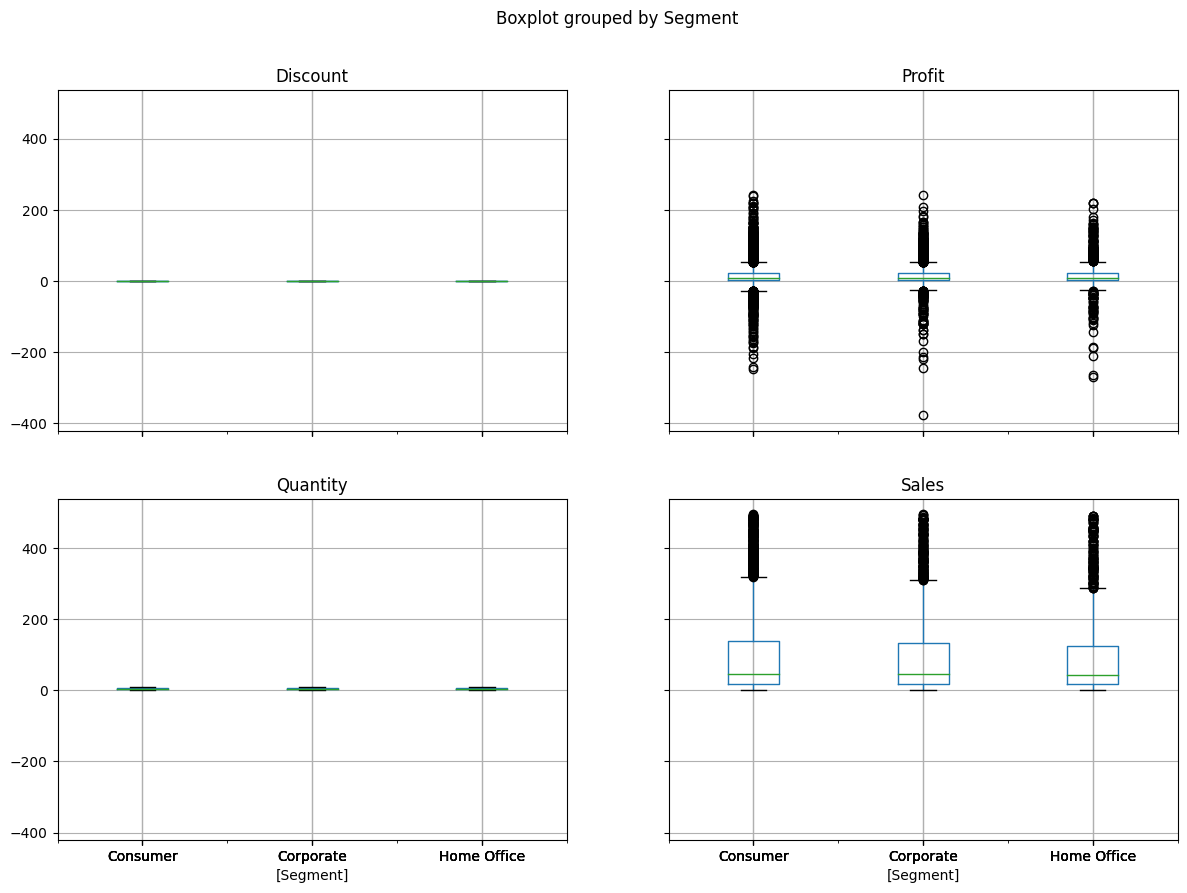

In [1159]:
# Create a boxplot to visualize the distribution of data
# grouped by the 'Segment' column
# The df_super_store dataframe is being used
# to generate the boxplot
# 'by='Segment' specifies that the data should be grouped
# and plotted according to the values in the 'Segment' column


df_super_store.boxplot(by='Segment', figsize=(14,10))

# Task 3:
Provide Python scripts to explain the relationships between variables and do bivariate analysis and visualisation as needed using all of the following:

#### the following method is used to create either **LogisticRegression** model or linear **LinearRegression**  and also print the accuracy of that model and return model to use it in prediction

In [1160]:
def train_and_evaluate_model(X, y, use_logistic_regression=True):

  # Split data
    """
    Trains and evaluates a model on data.
    Args:
        X: {Training data features in one line}
        y: {Target variable in one line}
        use_logistic_regression: {Whether to use logistic regression or linear regression in one line}
    Returns:
        model: {Trained model object in one line}
    Processing Logic:
        - Splits data into train and test sets
        - Standardizes feature values
        - Trains either a logistic regression or linear regression model
        - Makes predictions on test set
        - Evaluates model performance based on model type
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train model
    if use_logistic_regression:
      model = LogisticRegression()
    else:
      model = LinearRegression()

    model.fit(X_train_scaled, y_train)

    # Make predictions
    predictions = model.predict(X_test_scaled)

    # Evaluate model
    if use_logistic_regression:
      accuracy = accuracy_score(y_test, predictions)
      print_classification_report(y_test, predictions)
    else:
      mse = mean_squared_error(y_test, predictions)
      print(f'Linear Regression - Mean Squared Error: {mse}')

    return model

def print_classification_report(y_test, predictions):
  accuracy = accuracy_score(y_test, predictions)
  report = classification_report(y_test, predictions)

  print(f'Logistic Regression - Accuracy: {accuracy}')
  print('Classification Report:')
  print(report)

### 3.1 Two categorical variables

I want to find our date if there is relation between :
* Segment (dependent)

And (independent):
* Category
* Product Name
* Ship Mode

In [1161]:

# Columns to label encode
columns_to_encode = ['Category', 'Region', 'Ship Mode']

# Create a new DataFrame for label-encoded columns
df_encoded = df_super_store.copy()

# Instantiate a LabelEncoder
label_encoder = LabelEncoder()

# Iterate through specified columns and label encode
for column in columns_to_encode:
    df_encoded[column] = label_encoder.fit_transform(df_super_store[column])

df_super_store_independent = df_encoded[columns_to_encode]
df_super_store_dependent = df_super_store[['Segment']]

X = df_super_store_independent
y = df_super_store_dependent

# y = coef2 * sales + coef2 * quantity + coef3* Discount + e


In [1162]:
# Train and evaluate a machine learning model
# X is the input features
# y is the target variable
# use_logistic_regression specifies whether to use logistic regression or another model
# Trains a logistic regression model on the data if use_logistic_regression is True
# Evaluates the model on the training data after fitting
# Returns the trained model

model = train_and_evaluate_model(X, y, use_logistic_regression=True)

Logistic Regression - Accuracy: 0.5410566518141311
Classification Report:
              precision    recall  f1-score   support

    Consumer       0.54      1.00      0.70       850
   Corporate       0.00      0.00      0.00       470
 Home Office       0.00      0.00      0.00       251

    accuracy                           0.54      1571
   macro avg       0.18      0.33      0.23      1571
weighted avg       0.29      0.54      0.38      1571



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

In [1163]:
# Select the last 2 rows from the dataframe df_super_store
# Select only the columns: Segment, Category, Region, Ship Mode
df_super_store.tail(2)[['Segment','Category', 'Region', 'Ship Mode']]

,Segment,Category,Region,Ship Mode
7853,Consumer,Office Supplies,South,Second Class
7854,Corporate,Office Supplies,Central,Second Class


In [1164]:
# Get sample of data and encode it then try to predict by the model

df_sample = df_super_store.tail(5)[['Segment','Category', 'Region', 'Ship Mode']]

for column in columns_to_encode:
    df_sample[column] = label_encoder.fit_transform(df_sample[column])

print(df_sample)


          Segment  Category  Region  Ship Mode
7850  Home Office         1       0          0
7851     Consumer         1       1          1
7852     Consumer         1       2          1
7853     Consumer         0       2          0
7854    Corporate         0       0          0


In [1165]:
model.predict([[1 ,	1 ,	2]])

array(['Consumer'], dtype=object)

In [1166]:
model.predict([[2 ,	0 ,	2]])

array(['Consumer'], dtype=object)

**Important note: the data is imbalanced in the group section. You can detect the data biased toward the segment of "customer" as follows:**

In [1167]:
#get number of data related to each Segment in the df_super_store

df_super_store.groupby('Segment').size()


Segment
Consumer       4110
Corporate      2339
Home Office    1406
dtype: int64

In [1168]:
from imblearn.under_sampling import RandomUnderSampler

# Assuming X_train and y_train are your feature and target datasets
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)


In [1169]:
#now check data after oversampling
y_resampled.groupby('Segment').size()


Segment
Consumer       1406
Corporate      1406
Home Office    1406
dtype: int64

In [1170]:
#Original model before undersampling
model = train_and_evaluate_model(X, y, use_logistic_regression=True)

Logistic Regression - Accuracy: 0.5410566518141311
Classification Report:
              precision    recall  f1-score   support

    Consumer       0.54      1.00      0.70       850
   Corporate       0.00      0.00      0.00       470
 Home Office       0.00      0.00      0.00       251

    accuracy                           0.54      1571
   macro avg       0.18      0.33      0.23      1571
weighted avg       0.29      0.54      0.38      1571



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

In [1171]:
#model after undersampling
model = train_and_evaluate_model(X_resampled, y_resampled, use_logistic_regression=True)

Logistic Regression - Accuracy: 0.32109004739336494
Classification Report:
              precision    recall  f1-score   support

    Consumer       0.44      0.15      0.22       316
   Corporate       0.31      0.39      0.35       268
 Home Office       0.30      0.46      0.36       260

    accuracy                           0.32       844
   macro avg       0.35      0.33      0.31       844
weighted avg       0.35      0.32      0.30       844



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



`still, note good model after undersampling concerning Accuracy and other matrix of assessment `

### 3.2 Numerical vs numerical
    I want to find our date if there is relation between :
    * profit (dependent)

    And (independent):
    * Quantity
    * Sales

In [1172]:
# Separate the independent and dependent variables from the original dataframe
df_super_store_independent = df_super_store[['Sales','Quantity','Discount']]

# Only take the 'Profit' column as it is the dependent variable
df_super_store_dependent = df_super_store[['Profit']]

# Assign the independent variables to X
X = df_super_store_independent

# Assign the dependent variable to y
y = df_super_store_dependent

# Define the linear regression model
# Profit (dependent variable) is a linear combination of Sales, Quantity, Discount (independent variables) plus error
# y = coef1 * sales + coef2 * quantity + coef3* Discount + e

In [1173]:
# Train and evaluate a model on the training data
# If use_logistic_regression is False, it will use a different model
# like decision tree or neural network instead of logistic regression
model= train_and_evaluate_model(X, y, use_logistic_regression=False)

# Fit the trained model to the training data
# This finalizes the model training by fitting the model
# parameters to the data
model.fit(X,y)


Linear Regression - Mean Squared Error: 960.285979457755


LinearRegression()

In [1174]:
# Select the last 2 rows from the dataframe df_super_store
# Select only the columns 'Sales','Quantity','Discount','Profit'
# from the resulting dataframe

df_super_store.tail(2) [['Sales','Quantity','Discount','Profit']]

,Sales,Quantity,Discount,Profit
7853,491.55,5,0.0,240.8595
7854,491.55,5,0.0,240.8595


In [1175]:
model.predict([[447.944 ,	7 ,	0.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([[50.52302298]])

### 3.3 Categorical vs numerical
    I want to find our date if there is relation between :
    * Segment (dependent)

    And (independent):
    * Quantity
    * Sales
    * Discount




In [1176]:
# Separate the independent and dependent variables from the original dataframe
df_super_store_independent = df_super_store[['Sales','Quantity','Discount']]

# Independent variables are Sales, Quantity, and Discount
df_super_store_dependent = df_super_store[['Segment']]

# Dependent variable is Segment

# Assign the independent variables to X
X = df_super_store_independent

# Assign the dependent variable to y
y = df_super_store_dependent

# Define the linear regression model
# Segment (the dependent variable) is modeled as a linear combination of
# the independent variables (Sales, Quantity, Discount) plus some error e
# y = coef2 * sales + coef2 * quantity + coef3* Discount + e


In [1177]:
# Train and evaluate logistic regression
model= train_and_evaluate_model(X, y, use_logistic_regression=True)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Logistic Regression - Accuracy: 0.5410566518141311
Classification Report:
              precision    recall  f1-score   support

    Consumer       0.54      1.00      0.70       850
   Corporate       0.00      0.00      0.00       470
 Home Office       0.00      0.00      0.00       251

    accuracy                           0.54      1571
   macro avg       0.18      0.33      0.23      1571
weighted avg       0.29      0.54      0.38      1571



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [1178]:
# Select the random row from the dataframe df_super_store
# Select only the columns 'Sales','Quantity','Discount','Segment'
# from the resulting dataframe
sample_data = df_super_store.sample(1) [['Sales','Quantity','Discount','Segment']]

sample_data

,Sales,Quantity,Discount,Segment
6978,104.9,5,0.0,Home Office


In [1179]:
# Pass the sample input to the model's predict method to get a prediction output

model.predict(sample_data[['Sales','Quantity','Discount']])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



array(['Consumer'], dtype=object)